*Clustering* 20230802060


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
k = 3
kmeans =KMeans(n_clusters=k,random_state = 42)
df['cluster']=kmeans.fit_predict(X)
print("\nCluster Centers:\n", kmeans.cluster_centers_)



Cluster Centers:
 [[1.80253333e+01 2.15162500e+01 1.18899500e+02 1.01720250e+03
  1.00483250e-01 1.39864583e-01 1.55592750e-01 8.80074167e-02
  1.90773333e-01 6.10122500e-02 6.11375000e-01 1.23292583e+00
  4.31798333e+00 7.03945833e+01 6.68095000e-03 3.11200500e-02
  4.06749167e-02 1.51861500e-02 2.03288917e-02 3.97693333e-03
  2.16297500e+01 2.89182500e+01 1.44214167e+02 1.44232833e+03
  1.40504000e-01 3.45775500e-01 4.21397500e-01 1.76734833e-01
  3.16046667e-01 8.69750833e-02]
 [1.23865204e+01 1.84309592e+01 7.99461391e+01 4.81294964e+02
  9.45352758e-02 8.94614149e-02 5.90838866e-02 3.16443022e-02
  1.77725420e-01 6.35394484e-02 2.98327338e-01 1.21594317e+00
  2.11455803e+00 2.28588441e+01 7.16755635e-03 2.32263669e-02
  2.82199871e-02 1.04940384e-02 2.07394269e-02 3.74343237e-03
  1.38052974e+01 2.44523261e+01 9.02959952e+01 5.96283933e+02
  1.29173261e-01 2.17934652e-01 2.10555748e-01 8.82334796e-02
  2.81859472e-01 8.30209353e-02]
 [2.21940625e+01 2.21296875e+01 1.47653125e+02 

In [ ]:
score = silhouette_score(X, df['cluster'])
print("Silhouette Score:", score)

Silhouette Score: 0.6467642159647962


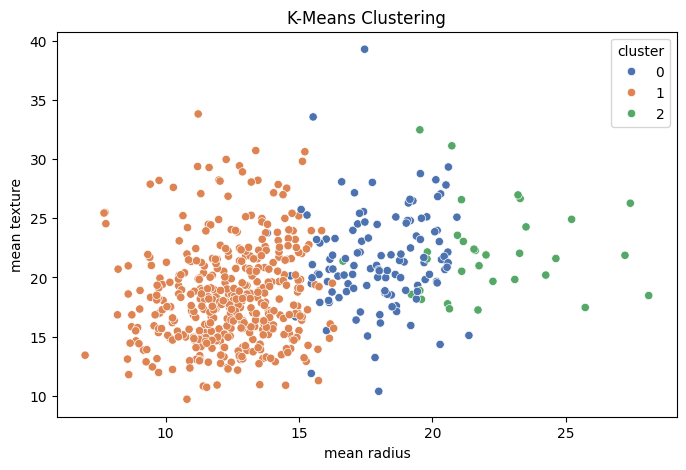

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['mean radius'],
    y=df['mean texture'],
    hue=df['cluster'],
    palette='deep'
)
plt.title('K-Means Clustering')
plt.show()

PCA
20230802060

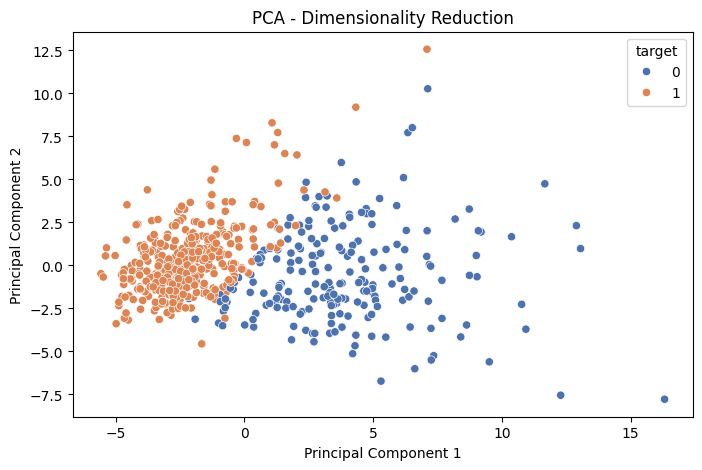

Explained Variance Ratio: [0.44272026 0.18971182]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='target',
    data=df_pca,
    palette='deep'
)
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Perform PCA on an image using TensorFlow. 20230802060


In [ ]:
ds, info = tfds.load('mnist', split='train', with_info=True, shuffle_files=True)
ds = ds.shuffle(1024).batch(32)
image_batch = next(iter(ds))['image']
print("Shape of image batch:", image_batch.shape)

Shape of image batch: (32, 28, 28, 1)


In [ ]:
if image_batch.shape[-1] == 3:
    image_batch = tf.image.rgb_to_grayscale(image_batch)

image_batch_flattened = tf.cast(tf.reshape(image_batch, [tf.shape(image_batch)[0], -1]), tf.float32)

image_batch_normalized = image_batch_flattened / 255.0

print("Shape of preprocessed image batch data:", image_batch_normalized.shape)

Shape of preprocessed image batch data: (32, 784)


In [ ]:
mean = tf.reduce_mean(image_batch_normalized, axis=0)
image_batch_centered = image_batch_normalized - mean

covariance_matrix = tf.linalg.matmul(image_batch_centered, image_batch_centered, transpose_a=True) / tf.cast(tf.shape(image_batch_centered)[0], tf.float32)

eigenvalues, eigenvectors = tf.linalg.eigh(covariance_matrix)

sorted_indices = tf.argsort(eigenvalues, direction='DESCENDING')
sorted_eigenvalues = tf.gather(eigenvalues, sorted_indices)
sorted_eigenvectors = tf.gather(eigenvectors, sorted_indices, axis=1)

n_components = 50
top_eigenvectors = sorted_eigenvectors[:, :n_components]
pca_transformed_data = tf.linalg.matmul(image_batch_centered, top_eigenvectors)

print("Shape of PCA-transformed data:", pca_transformed_data.shape)
print("Explained variance ratio of top components:", tf.reduce_sum(sorted_eigenvalues[:n_components]) / tf.reduce_sum(sorted_eigenvalues))

Shape of PCA-transformed data: (32, 50)
Explained variance ratio of top components: tf.Tensor(1.0000001, shape=(), dtype=float32)


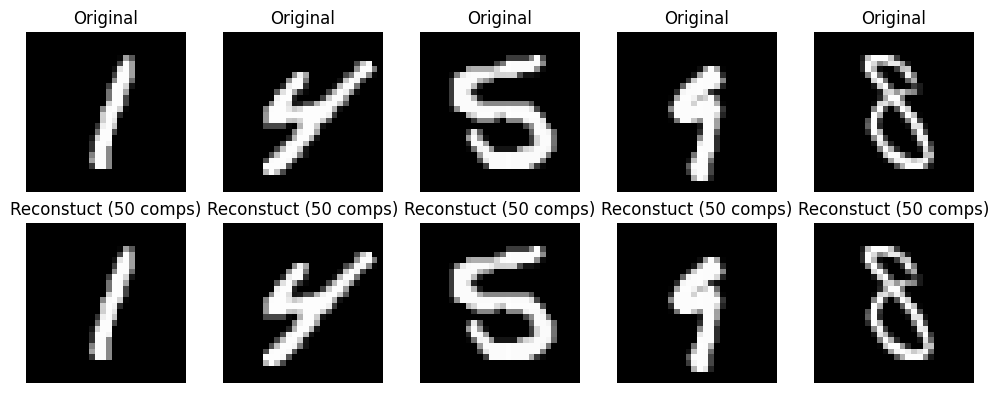

In [ ]:
num_samples_to_show = 5
selected_indices = tf.random.uniform(shape=[num_samples_to_show], maxval=tf.shape(image_batch)[0], dtype=tf.int32)

original_samples = tf.gather(image_batch, selected_indices)
pca_transformed_samples = tf.gather(pca_transformed_data, selected_indices)

reconstructed_centered_samples = tf.linalg.matmul(pca_transformed_samples, top_eigenvectors, transpose_b=True)
reconstructed_normalized_samples = reconstructed_centered_samples + mean

original_shape = tf.shape(image_batch).numpy()[1:3]
original_samples_reshaped = tf.reshape(original_samples, [-1, original_shape[0], original_shape[1]])
reconstructed_samples_reshaped = tf.reshape(reconstructed_normalized_samples, [-1, original_shape[0], original_shape[1]])


plt.figure(figsize=(2 * num_samples_to_show, 4)) # Adjust figure size for a wider layout
for i in range(num_samples_to_show):
    # Plot original images on the first row
    plt.subplot(2, num_samples_to_show, i + 1)
    plt.imshow(tf.squeeze(original_samples_reshaped[i]), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Plot reconstructed images on the second row
    plt.subplot(2, num_samples_to_show, num_samples_to_show + i + 1)
    plt.imshow(reconstructed_samples_reshaped[i].numpy(), cmap='gray')
    plt.title(f'Reconstuct ({n_components} comps)')
    plt.axis('off')

plt.tight_layout()
plt.show()